In [1]:
import numpy as np
import pandas as pd

In [2]:
match= pd.read_csv('/content/matches.csv')
delivery= pd.read_csv('/content/deliveries.csv')


In [3]:
match.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
match.shape

(756, 18)

In [5]:
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,4.0,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,2.0,NaN,NaN,NaN


In [6]:
total_score_df=delivery.groupby(['match_id','inning']).sum()['total_runs'].reset_index()

In [8]:
total_score_df=total_score_df[total_score_df['inning']==1]

In [9]:
total_score_df

,match_id,inning,total_runs
0,1,1,207.0
2,2,1,184.0
4,3,1,183.0
6,4,1,163.0
8,5,1,157.0
...,...,...,...
432,214,1,184.0
434,215,1,154.0
436,216,1,138.0
438,217,1,160.0


In [10]:
match_df=match.merge(total_score_df[['match_id','total_runs']],left_on='id',right_on='match_id')

In [11]:
match_df

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,207.0
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,2,184.0
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,3,183.0
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,4,163.0
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,157.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,214,IPL-2010,Bangalore,08-04-2010,Royal Challengers Bangalore,Deccan Chargers,Deccan Chargers,field,normal,0,Deccan Chargers,0,7,TL Suman,M Chinnaswamy Stadium,S Asnani,DJ Harper,NaN,214,184.0
214,215,IPL-2010,Chandigarh,09-04-2010,Mumbai Indians,Kings XI Punjab,Mumbai Indians,bat,normal,0,Kings XI Punjab,0,6,KC Sangakkara,"Punjab Cricket Association Stadium, Mohali",M Erasmus,AM Saheba,NaN,215,154.0
215,216,IPL-2010,Nagpur,10-04-2010,Chennai Super Kings,Deccan Chargers,Chennai Super Kings,bat,normal,0,Deccan Chargers,0,6,RJ Harris,"Vidarbha Cricket Association Stadium, Jamtha",HDPK Dharmasena,SJA Taufel,NaN,216,138.0
216,217,IPL-2010,Bangalore,10-04-2010,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,R Vinay Kumar,M Chinnaswamy Stadium,K Hariharan,DJ Harper,NaN,217,160.0


In [12]:
match_df['team1']=match_df['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
match_df['team2']=match_df['team2'].str.replace('Delhi Daredevils','Delhi Capitals')

match_df['team1']=match_df['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
match_df['team2']=match_df['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')


In [13]:
teams=[ 'Sunrisers Hyderabad', 'Mumbai Indians', 'Royal Challengers Bangalore', 'Kolkata Knight Riders', 'Kings XI Punjab', 'Chennai Super Kings', 'Rajasthan Royals', 'Delhi Capitals' ]

In [14]:
match_df = match_df[match_df['team1'].isin(teams)]
match_df = match_df[match_df['team2'].isin(teams)]


In [15]:
match_df.shape

(190, 20)

In [16]:
match_df['dl_applied'].value_counts()

dl_applied
0    184
1      6
Name: count, dtype: int64

In [17]:
match_df=match_df[match_df['dl_applied']==0]

In [18]:
print (match_df)

      id    Season        city        date                        team1  \
0      1  IPL-2017   Hyderabad  05-04-2017          Sunrisers Hyderabad   
4      5  IPL-2017   Bangalore  08-04-2017  Royal Challengers Bangalore   
6      7  IPL-2017      Mumbai  09-04-2017        Kolkata Knight Riders   
7      8  IPL-2017      Indore  10-04-2017  Royal Challengers Bangalore   
9     10  IPL-2017      Mumbai  12-04-2017          Sunrisers Hyderabad   
..   ...       ...         ...         ...                          ...   
213  214  IPL-2010   Bangalore  08-04-2010  Royal Challengers Bangalore   
214  215  IPL-2010  Chandigarh  09-04-2010               Mumbai Indians   
215  216  IPL-2010      Nagpur  10-04-2010          Chennai Super Kings   
216  217  IPL-2010   Bangalore  10-04-2010        Kolkata Knight Riders   
217  218  IPL-2010       Delhi  11-04-2010               Delhi Capitals   

                           team2                  toss_winner toss_decision  \
0    Royal Challenge

In [19]:
match_df.merge(delivery,on='match_id')

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
1,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0.0,0.0,0.0,0.0,4.0,0.0,4.0,NaN,NaN,NaN
3,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
4,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0.0,0.0,0.0,0.0,0.0,2.0,2.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43993,218,IPL-2010,Delhi,11-04-2010,Delhi Capitals,Kings XI Punjab,Delhi Daredevils,bat,normal,0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,NaN,NaN,NaN
43994,218,IPL-2010,Delhi,11-04-2010,Delhi Capitals,Kings XI Punjab,Delhi Daredevils,bat,normal,0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,NaN,NaN,NaN
43995,218,IPL-2010,Delhi,11-04-2010,Delhi Capitals,Kings XI Punjab,Delhi Daredevils,bat,normal,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
43996,218,IPL-2010,Delhi,11-04-2010,Delhi Capitals,Kings XI Punjab,Delhi Daredevils,bat,normal,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN


In [20]:
match_df=match_df[['match_id','city','winner','total_runs']]

In [21]:
delivery_df=match_df.merge(delivery,on='match_id')

In [22]:
match_df

,match_id,city,winner,total_runs
0,1,Hyderabad,Sunrisers Hyderabad,207.0
4,5,Bangalore,Royal Challengers Bangalore,157.0
6,7,Mumbai,Mumbai Indians,178.0
7,8,Indore,Kings XI Punjab,148.0
9,10,Mumbai,Mumbai Indians,158.0
...,...,...,...,...
213,214,Bangalore,Deccan Chargers,184.0
214,215,Chandigarh,Kings XI Punjab,154.0
215,216,Nagpur,Deccan Chargers,138.0
216,217,Bangalore,Royal Challengers Bangalore,160.0


In [23]:
delivery_df=delivery_df[delivery_df['inning']==1]

In [24]:
delivery_df.shape

(22812, 24)

In [25]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
0,1,Hyderabad,Sunrisers Hyderabad,207.0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
1,1,Hyderabad,Sunrisers Hyderabad,207.0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2,1,Hyderabad,Sunrisers Hyderabad,207.0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,...,0.0,0.0,0.0,0.0,4.0,0.0,4.0,NaN,NaN,NaN
3,1,Hyderabad,Sunrisers Hyderabad,207.0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
4,1,Hyderabad,Sunrisers Hyderabad,207.0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,...,0.0,0.0,0.0,0.0,0.0,2.0,2.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43900,218,Delhi,Kings XI Punjab,111.0,1,Delhi Daredevils,Kings XI Punjab,20,1,A Mishra,...,0.0,0.0,0.0,0.0,2.0,0.0,2.0,NaN,NaN,NaN
43901,218,Delhi,Kings XI Punjab,111.0,1,Delhi Daredevils,Kings XI Punjab,20,2,A Mishra,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,NaN,NaN,NaN
43902,218,Delhi,Kings XI Punjab,111.0,1,Delhi Daredevils,Kings XI Punjab,20,3,A Mishra,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,NaN,NaN,NaN
43903,218,Delhi,Kings XI Punjab,111.0,1,Delhi Daredevils,Kings XI Punjab,20,4,A Nehra,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN


In [26]:
delivery_df['total_runs_y'] = pd.to_numeric(delivery_df['total_runs_y'])

In [27]:
delivery_df['total_runs_y'] = delivery_df['total_runs_y'].apply(pd.to_numeric, errors='coerce')

In [28]:
delivery_df['total_runs_y'] = delivery_df['total_runs_y'].astype(np.int64)

In [29]:
delivery_df['current_score']=delivery_df.groupby('match_id').cumsum()['total_runs_y']

NotImplementedError: function is not implemented for this dtype: [how->cumsum,dtype->object]

In [30]:
import pandas as pd

# Convert 'total_runs_y' column to numeric type
delivery_df['total_runs_y'] = pd.to_numeric(delivery_df['total_runs_y'], errors='coerce')

# Calculate cumulative sum within each match_id group
delivery_df['current_score'] = delivery_df.groupby('match_id')['total_runs_y'].cumsum()


In [31]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score
0,1,Hyderabad,Sunrisers Hyderabad,207.0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,...,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,NaN,0
1,1,Hyderabad,Sunrisers Hyderabad,207.0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,...,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,NaN,0
2,1,Hyderabad,Sunrisers Hyderabad,207.0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,...,0.0,0.0,0.0,4.0,0.0,4,NaN,NaN,NaN,4
3,1,Hyderabad,Sunrisers Hyderabad,207.0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,...,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,NaN,4
4,1,Hyderabad,Sunrisers Hyderabad,207.0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,...,0.0,0.0,0.0,0.0,2.0,2,NaN,NaN,NaN,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43900,218,Delhi,Kings XI Punjab,111.0,1,Delhi Daredevils,Kings XI Punjab,20,1,A Mishra,...,0.0,0.0,0.0,2.0,0.0,2,NaN,NaN,NaN,109
43901,218,Delhi,Kings XI Punjab,111.0,1,Delhi Daredevils,Kings XI Punjab,20,2,A Mishra,...,0.0,0.0,0.0,0.0,1.0,1,NaN,NaN,NaN,110
43902,218,Delhi,Kings XI Punjab,111.0,1,Delhi Daredevils,Kings XI Punjab,20,3,A Mishra,...,0.0,0.0,0.0,1.0,0.0,1,NaN,NaN,NaN,111
43903,218,Delhi,Kings XI Punjab,111.0,1,Delhi Daredevils,Kings XI Punjab,20,4,A Nehra,...,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,NaN,111


In [32]:
delivery_df['runs_left']=delivery_df['total_runs_x']-delivery_df['current_score']

In [33]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left
0,1,Hyderabad,Sunrisers Hyderabad,207.0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,...,0.0,0.0,0.0,0.0,0,NaN,NaN,NaN,0,207.0
1,1,Hyderabad,Sunrisers Hyderabad,207.0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,...,0.0,0.0,0.0,0.0,0,NaN,NaN,NaN,0,207.0
2,1,Hyderabad,Sunrisers Hyderabad,207.0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,...,0.0,0.0,4.0,0.0,4,NaN,NaN,NaN,4,203.0
3,1,Hyderabad,Sunrisers Hyderabad,207.0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,...,0.0,0.0,0.0,0.0,0,NaN,NaN,NaN,4,203.0
4,1,Hyderabad,Sunrisers Hyderabad,207.0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,...,0.0,0.0,0.0,2.0,2,NaN,NaN,NaN,6,201.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43900,218,Delhi,Kings XI Punjab,111.0,1,Delhi Daredevils,Kings XI Punjab,20,1,A Mishra,...,0.0,0.0,2.0,0.0,2,NaN,NaN,NaN,109,2.0
43901,218,Delhi,Kings XI Punjab,111.0,1,Delhi Daredevils,Kings XI Punjab,20,2,A Mishra,...,0.0,0.0,0.0,1.0,1,NaN,NaN,NaN,110,1.0
43902,218,Delhi,Kings XI Punjab,111.0,1,Delhi Daredevils,Kings XI Punjab,20,3,A Mishra,...,0.0,0.0,1.0,0.0,1,NaN,NaN,NaN,111,0.0
43903,218,Delhi,Kings XI Punjab,111.0,1,Delhi Daredevils,Kings XI Punjab,20,4,A Nehra,...,0.0,0.0,0.0,0.0,0,NaN,NaN,NaN,111,0.0


In [34]:
delivery_df['balls_left']=126-(delivery_df['over']*6+delivery_df['ball'])

In [35]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left
0,1,Hyderabad,Sunrisers Hyderabad,207.0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,...,0.0,0.0,0.0,0,NaN,NaN,NaN,0,207.0,119
1,1,Hyderabad,Sunrisers Hyderabad,207.0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,...,0.0,0.0,0.0,0,NaN,NaN,NaN,0,207.0,118
2,1,Hyderabad,Sunrisers Hyderabad,207.0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,...,0.0,4.0,0.0,4,NaN,NaN,NaN,4,203.0,117
3,1,Hyderabad,Sunrisers Hyderabad,207.0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,...,0.0,0.0,0.0,0,NaN,NaN,NaN,4,203.0,116
4,1,Hyderabad,Sunrisers Hyderabad,207.0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,...,0.0,0.0,2.0,2,NaN,NaN,NaN,6,201.0,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43900,218,Delhi,Kings XI Punjab,111.0,1,Delhi Daredevils,Kings XI Punjab,20,1,A Mishra,...,0.0,2.0,0.0,2,NaN,NaN,NaN,109,2.0,5
43901,218,Delhi,Kings XI Punjab,111.0,1,Delhi Daredevils,Kings XI Punjab,20,2,A Mishra,...,0.0,0.0,1.0,1,NaN,NaN,NaN,110,1.0,4
43902,218,Delhi,Kings XI Punjab,111.0,1,Delhi Daredevils,Kings XI Punjab,20,3,A Mishra,...,0.0,1.0,0.0,1,NaN,NaN,NaN,111,0.0,3
43903,218,Delhi,Kings XI Punjab,111.0,1,Delhi Daredevils,Kings XI Punjab,20,4,A Nehra,...,0.0,0.0,0.0,0,NaN,NaN,NaN,111,0.0,2


In [36]:
delivery_df['player_dismissed']=delivery_df['player_dismissed'].fillna("0")
delivery_df['player_dismissed']=delivery_df['player_dismissed'].apply(lambda x:x if x=="0" else "1")
delivery_df['player_dismissed']=delivery_df['player_dismissed'].astype('int')
wickets = delivery_df.groupby('match_id').cumsum()['player_dismissed'].values
delivery_df['wickets']=10-wickets
delivery_df.head()

NotImplementedError: function is not implemented for this dtype: [how->cumsum,dtype->object]

In [37]:
# Fill missing values in 'player_dismissed' column with '0'
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].fillna("0")

# Convert 'player_dismissed' column to integers
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].astype(int)

# Calculate cumulative sum of wickets per match
wickets_cumsum = delivery_df.groupby('match_id')['player_dismissed'].cumsum()

# Calculate remaining wickets
delivery_df['wickets'] = 10 - wickets_cumsum

# Display the DataFrame
delivery_df.head()


,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets
0,1,Hyderabad,Sunrisers Hyderabad,207.0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,...,0.0,0.0,0,0,NaN,NaN,0,207.0,119,10
1,1,Hyderabad,Sunrisers Hyderabad,207.0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,...,0.0,0.0,0,0,NaN,NaN,0,207.0,118,10
2,1,Hyderabad,Sunrisers Hyderabad,207.0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,...,4.0,0.0,4,0,NaN,NaN,4,203.0,117,10
3,1,Hyderabad,Sunrisers Hyderabad,207.0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,...,0.0,0.0,0,0,NaN,NaN,4,203.0,116,10
4,1,Hyderabad,Sunrisers Hyderabad,207.0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,...,0.0,2.0,2,0,NaN,NaN,6,201.0,115,10


In [38]:
(delivery_df['current_score']*6)/(120-delivery_df['balls_left'])

0        0.000000
1        0.000000
2        8.000000
3        6.000000
4        7.200000
           ...   
43900    5.686957
43901    5.689655
43902    5.692308
43903    5.644068
43904    5.596639
Length: 22812, dtype: float64

In [39]:
delivery_df['crr']=(delivery_df['current_score']*6)/(120-delivery_df['balls_left'])

In [40]:
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets,crr
0,1,Hyderabad,Sunrisers Hyderabad,207.0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,...,0.0,0,0,NaN,NaN,0,207.0,119,10,0.0
1,1,Hyderabad,Sunrisers Hyderabad,207.0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,...,0.0,0,0,NaN,NaN,0,207.0,118,10,0.0
2,1,Hyderabad,Sunrisers Hyderabad,207.0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,...,0.0,4,0,NaN,NaN,4,203.0,117,10,8.0
3,1,Hyderabad,Sunrisers Hyderabad,207.0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,...,0.0,0,0,NaN,NaN,4,203.0,116,10,6.0
4,1,Hyderabad,Sunrisers Hyderabad,207.0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,...,2.0,2,0,NaN,NaN,6,201.0,115,10,7.2


In [41]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets,crr
0,1,Hyderabad,Sunrisers Hyderabad,207.0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,...,0.0,0,0,NaN,NaN,0,207.0,119,10,0.000000
1,1,Hyderabad,Sunrisers Hyderabad,207.0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,...,0.0,0,0,NaN,NaN,0,207.0,118,10,0.000000
2,1,Hyderabad,Sunrisers Hyderabad,207.0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,...,0.0,4,0,NaN,NaN,4,203.0,117,10,8.000000
3,1,Hyderabad,Sunrisers Hyderabad,207.0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,...,0.0,0,0,NaN,NaN,4,203.0,116,10,6.000000
4,1,Hyderabad,Sunrisers Hyderabad,207.0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,...,2.0,2,0,NaN,NaN,6,201.0,115,10,7.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43900,218,Delhi,Kings XI Punjab,111.0,1,Delhi Daredevils,Kings XI Punjab,20,1,A Mishra,...,0.0,2,0,NaN,NaN,109,2.0,5,1,5.686957
43901,218,Delhi,Kings XI Punjab,111.0,1,Delhi Daredevils,Kings XI Punjab,20,2,A Mishra,...,1.0,1,0,NaN,NaN,110,1.0,4,1,5.689655
43902,218,Delhi,Kings XI Punjab,111.0,1,Delhi Daredevils,Kings XI Punjab,20,3,A Mishra,...,0.0,1,0,NaN,NaN,111,0.0,3,1,5.692308
43903,218,Delhi,Kings XI Punjab,111.0,1,Delhi Daredevils,Kings XI Punjab,20,4,A Nehra,...,0.0,0,0,NaN,NaN,111,0.0,2,1,5.644068


In [42]:
delivery_df['rrr']=(delivery_df['runs_left']*6)/delivery_df['balls_left']

In [43]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets,crr,rrr
0,1,Hyderabad,Sunrisers Hyderabad,207.0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,...,0,0,NaN,NaN,0,207.0,119,10,0.000000,10.436975
1,1,Hyderabad,Sunrisers Hyderabad,207.0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,...,0,0,NaN,NaN,0,207.0,118,10,0.000000,10.525424
2,1,Hyderabad,Sunrisers Hyderabad,207.0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,...,4,0,NaN,NaN,4,203.0,117,10,8.000000,10.410256
3,1,Hyderabad,Sunrisers Hyderabad,207.0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,...,0,0,NaN,NaN,4,203.0,116,10,6.000000,10.500000
4,1,Hyderabad,Sunrisers Hyderabad,207.0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,...,2,0,NaN,NaN,6,201.0,115,10,7.200000,10.486957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43900,218,Delhi,Kings XI Punjab,111.0,1,Delhi Daredevils,Kings XI Punjab,20,1,A Mishra,...,2,0,NaN,NaN,109,2.0,5,1,5.686957,2.400000
43901,218,Delhi,Kings XI Punjab,111.0,1,Delhi Daredevils,Kings XI Punjab,20,2,A Mishra,...,1,0,NaN,NaN,110,1.0,4,1,5.689655,1.500000
43902,218,Delhi,Kings XI Punjab,111.0,1,Delhi Daredevils,Kings XI Punjab,20,3,A Mishra,...,1,0,NaN,NaN,111,0.0,3,1,5.692308,0.000000
43903,218,Delhi,Kings XI Punjab,111.0,1,Delhi Daredevils,Kings XI Punjab,20,4,A Nehra,...,0,0,NaN,NaN,111,0.0,2,1,5.644068,0.000000


In [44]:
def result(row):
    return 1 if row['batting_team']==row['winner'] else 0

In [45]:
delivery_df['result']=delivery_df.apply(result,axis=1)


In [46]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets,crr,rrr,result
0,1,Hyderabad,Sunrisers Hyderabad,207.0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,...,0,NaN,NaN,0,207.0,119,10,0.000000,10.436975,1
1,1,Hyderabad,Sunrisers Hyderabad,207.0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,...,0,NaN,NaN,0,207.0,118,10,0.000000,10.525424,1
2,1,Hyderabad,Sunrisers Hyderabad,207.0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,...,0,NaN,NaN,4,203.0,117,10,8.000000,10.410256,1
3,1,Hyderabad,Sunrisers Hyderabad,207.0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,...,0,NaN,NaN,4,203.0,116,10,6.000000,10.500000,1
4,1,Hyderabad,Sunrisers Hyderabad,207.0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,...,0,NaN,NaN,6,201.0,115,10,7.200000,10.486957,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43900,218,Delhi,Kings XI Punjab,111.0,1,Delhi Daredevils,Kings XI Punjab,20,1,A Mishra,...,0,NaN,NaN,109,2.0,5,1,5.686957,2.400000,0
43901,218,Delhi,Kings XI Punjab,111.0,1,Delhi Daredevils,Kings XI Punjab,20,2,A Mishra,...,0,NaN,NaN,110,1.0,4,1,5.689655,1.500000,0
43902,218,Delhi,Kings XI Punjab,111.0,1,Delhi Daredevils,Kings XI Punjab,20,3,A Mishra,...,0,NaN,NaN,111,0.0,3,1,5.692308,0.000000,0
43903,218,Delhi,Kings XI Punjab,111.0,1,Delhi Daredevils,Kings XI Punjab,20,4,A Nehra,...,0,NaN,NaN,111,0.0,2,1,5.644068,0.000000,0


In [47]:
final_df = delivery_df[['batting_team', 'bowling_team', 'city', 'runs_left', 'balls_left', 'wickets', 'total_runs_x', 'crr', 'rrr', 'result']]


In [48]:
final_df=final_df.sample(final_df.shape[0])

In [49]:
final_df.sample()

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
1304,Kings XI Punjab,Kolkata Knight Riders,Kolkata,33.0,24,6,170.0,8.5625,8.25,0


In [50]:
delivery_df['result']=delivery_df.apply(result,axis=1)

In [51]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets,crr,rrr,result
0,1,Hyderabad,Sunrisers Hyderabad,207.0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,...,0,NaN,NaN,0,207.0,119,10,0.000000,10.436975,1
1,1,Hyderabad,Sunrisers Hyderabad,207.0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,...,0,NaN,NaN,0,207.0,118,10,0.000000,10.525424,1
2,1,Hyderabad,Sunrisers Hyderabad,207.0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,...,0,NaN,NaN,4,203.0,117,10,8.000000,10.410256,1
3,1,Hyderabad,Sunrisers Hyderabad,207.0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,...,0,NaN,NaN,4,203.0,116,10,6.000000,10.500000,1
4,1,Hyderabad,Sunrisers Hyderabad,207.0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,...,0,NaN,NaN,6,201.0,115,10,7.200000,10.486957,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43900,218,Delhi,Kings XI Punjab,111.0,1,Delhi Daredevils,Kings XI Punjab,20,1,A Mishra,...,0,NaN,NaN,109,2.0,5,1,5.686957,2.400000,0
43901,218,Delhi,Kings XI Punjab,111.0,1,Delhi Daredevils,Kings XI Punjab,20,2,A Mishra,...,0,NaN,NaN,110,1.0,4,1,5.689655,1.500000,0
43902,218,Delhi,Kings XI Punjab,111.0,1,Delhi Daredevils,Kings XI Punjab,20,3,A Mishra,...,0,NaN,NaN,111,0.0,3,1,5.692308,0.000000,0
43903,218,Delhi,Kings XI Punjab,111.0,1,Delhi Daredevils,Kings XI Punjab,20,4,A Nehra,...,0,NaN,NaN,111,0.0,2,1,5.644068,0.000000,0


In [52]:
final_df=delivery_df[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr','result']]

In [53]:
final_df

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
0,Sunrisers Hyderabad,Royal Challengers Bangalore,Hyderabad,207.0,119,10,207.0,0.000000,10.436975,1
1,Sunrisers Hyderabad,Royal Challengers Bangalore,Hyderabad,207.0,118,10,207.0,0.000000,10.525424,1
2,Sunrisers Hyderabad,Royal Challengers Bangalore,Hyderabad,203.0,117,10,207.0,8.000000,10.410256,1
3,Sunrisers Hyderabad,Royal Challengers Bangalore,Hyderabad,203.0,116,10,207.0,6.000000,10.500000,1
4,Sunrisers Hyderabad,Royal Challengers Bangalore,Hyderabad,201.0,115,10,207.0,7.200000,10.486957,1
...,...,...,...,...,...,...,...,...,...,...
43900,Delhi Daredevils,Kings XI Punjab,Delhi,2.0,5,1,111.0,5.686957,2.400000,0
43901,Delhi Daredevils,Kings XI Punjab,Delhi,1.0,4,1,111.0,5.689655,1.500000,0
43902,Delhi Daredevils,Kings XI Punjab,Delhi,0.0,3,1,111.0,5.692308,0.000000,0
43903,Delhi Daredevils,Kings XI Punjab,Delhi,0.0,2,1,111.0,5.644068,0.000000,0


In [54]:
final_df=final_df.sample(final_df.shape[0])

In [55]:
final_df.sample()

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
17318,Kings XI Punjab,Mumbai Indians,Mumbai,188.0,117,9,189.0,2.0,9.641026,1


In [56]:
final_df.dropna(inplace=True)

In [57]:
final_df= final_df[final_df['balls_left']!=0]


In [58]:
X=final_df.iloc[:,:-1]
y=final_df.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [113]:
final_df.dropna(inplace=True)

In [59]:
X_train

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr
42863,Royal Challengers Bangalore,Deccan Chargers,Bangalore,127.0,74,9,184.0,7.434783,10.297297
2519,Sunrisers Hyderabad,Kings XI Punjab,Hyderabad,47.0,25,6,159.0,7.073684,11.280000
24863,Royal Challengers Bangalore,Kings XI Punjab,Durban,98.0,75,7,145.0,6.266667,7.840000
25586,Kolkata Knight Riders,Kings XI Punjab,Port Elizabeth,130.0,92,9,153.0,4.928571,8.478261
32839,Chennai Super Kings,Royal Challengers Bangalore,Johannesburg,146.0,119,10,146.0,0.000000,7.361345
...,...,...,...,...,...,...,...,...,...
14173,Royal Challengers Bangalore,Mumbai Indians,Bangalore,24.0,26,3,122.0,6.255319,5.538462
18413,Rajasthan Royals,Chennai Super Kings,Chennai,12.0,10,6,211.0,10.854545,7.200000
41616,Delhi Daredevils,Royal Challengers Bangalore,Delhi,138.0,92,9,184.0,9.857143,9.000000
34196,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata,5.0,3,3,135.0,6.666667,10.000000


In [60]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

trf = ColumnTransformer([
        ('trf', OneHotEncoder(sparse=False, drop='first'), ['batting_team', 'bowling_team', 'city'])
    ],
    remainder='passthrough'
)


In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [62]:
pipe = Pipeline(steps=[
    ('step1',trf),
    ('step2',LogisticRegression(solver='liblinear'))
])

In [63]:
final_df.isnull().sum()

batting_team    0
bowling_team    0
city            0
runs_left       0
balls_left      0
wickets         0
total_runs_x    0
crr             0
rrr             0
result          0
dtype: int64

In [64]:
final_df.dropna(inplace=True)

In [65]:
X_train

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr
42863,Royal Challengers Bangalore,Deccan Chargers,Bangalore,127.0,74,9,184.0,7.434783,10.297297
2519,Sunrisers Hyderabad,Kings XI Punjab,Hyderabad,47.0,25,6,159.0,7.073684,11.280000
24863,Royal Challengers Bangalore,Kings XI Punjab,Durban,98.0,75,7,145.0,6.266667,7.840000
25586,Kolkata Knight Riders,Kings XI Punjab,Port Elizabeth,130.0,92,9,153.0,4.928571,8.478261
32839,Chennai Super Kings,Royal Challengers Bangalore,Johannesburg,146.0,119,10,146.0,0.000000,7.361345
...,...,...,...,...,...,...,...,...,...
14173,Royal Challengers Bangalore,Mumbai Indians,Bangalore,24.0,26,3,122.0,6.255319,5.538462
18413,Rajasthan Royals,Chennai Super Kings,Chennai,12.0,10,6,211.0,10.854545,7.200000
41616,Delhi Daredevils,Royal Challengers Bangalore,Delhi,138.0,92,9,184.0,9.857143,9.000000
34196,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata,5.0,3,3,135.0,6.666667,10.000000


In [66]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

trf = ColumnTransformer([
    ('trf',OneHotEncoder(sparse=False,drop='first'),['batting_team','bowling_team','city'])
]
                        ,remainder='passthrough')

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

In [68]:
pipe=Pipeline(steps=[
    ('step1',trf),
    ('step2',LogisticRegression(solver='liblinear'))
])

In [69]:
pipe.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [70]:
X_train.describe()

,runs_left,balls_left,wickets,total_runs_x,crr,rrr
count,18114.000000,18114.000000,18114.000000,18114.000000,18114.000000,18114.000000
mean,86.203820,60.243789,7.435851,161.425306,7.289444,9.138626
std,49.451806,34.479454,2.055488,29.601217,2.157712,3.380539
min,0.000000,-2.000000,0.000000,67.000000,0.000000,-36.000000
25%,46.000000,30.000000,6.000000,143.000000,6.083627,7.428571
50%,85.000000,60.000000,8.000000,162.000000,7.354839,8.780488
75%,124.000000,90.000000,9.000000,181.000000,8.557163,10.456494
max,245.000000,119.000000,10.000000,246.000000,36.000000,54.000000


In [71]:
y_pred=pipe.predict(X_test)

In [72]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7727975270479135

In [73]:
pipe.predict_proba(X_test)[7]

array([0.89028046, 0.10971954])

In [74]:
def match_summary(row):
    print("Batting Team-" + row['batting_team']+ " | Bowling Team-" +  row['bowling_team']+"| Target-" + str(row['total_runs_x']))

In [75]:
def match_progression(x_df, match_id, pipe):
    match = x_df[x_df['match_id'] == match_id]
    match = match[match['ball'] == 6]
    temp_df = match[['batting_team', 'bowling_team', 'city', 'runs_left', 'balls_left', 'wickets', 'total_runs_x', 'crr', 'rrr']]
    temp_df = temp_df[temp_df['balls_left'] != 0]
    result = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0] * 100, 1)
    temp_df['win'] = np.round(result.T[1] * 100, 1)
    temp_df['end_of_over'] = range(1, temp_df.shape[0] + 1)

    target = temp_df['total_runs_x'].values[0]
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0, target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    wickets = list(temp_df['wickets'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0, 10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]
    print("Target-", target)
    temp_df = temp_df[['end_of_over', 'runs_after_over', 'wickets_in_over', 'lose', 'win']]
    return temp_df, target

In [85]:
temp_df,target=match_progression(delivery_df,88,pipe)
temp_df

Target- 129.0


,end_of_over,runs_after_over,wickets_in_over,lose,win
13662,1,2.0,0,78.9,21.1
13668,2,7.0,0,78.7,21.3
13675,3,6.0,1,77.8,22.2
13682,4,10.0,1,76.7,23.3
13688,5,11.0,0,76.8,23.2
13694,6,5.0,0,77.4,22.6
13700,7,4.0,0,77.9,22.1
13706,8,4.0,1,77.2,22.8
13712,9,15.0,1,76.1,23.9
13718,10,12.0,0,76.3,23.7


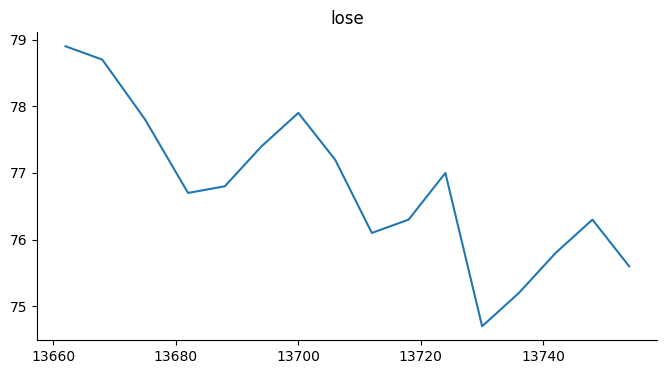

In [86]:
from matplotlib import pyplot as plt
temp_df['lose'].plot(kind='line', figsize=(8, 4), title='lose')
plt.gca().spines[['top', 'right']].set_visible(False)

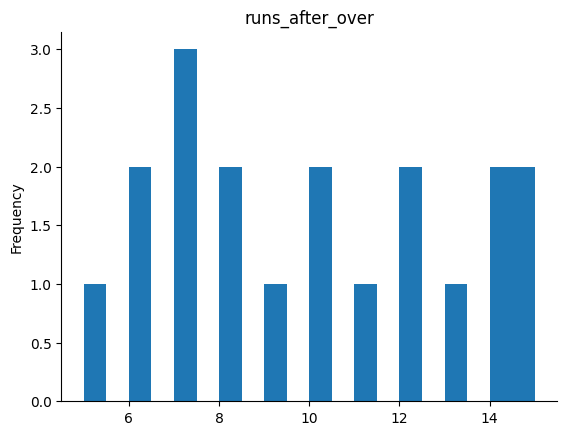

In [83]:
from matplotlib import pyplot as plt
temp_df['runs_after_over'].plot(kind='hist', bins=20, title='runs_after_over')
plt.gca().spines[['top', 'right',]].set_visible(False)

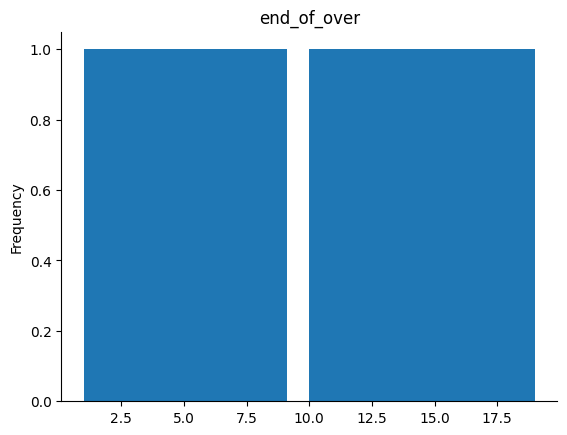

In [79]:
from matplotlib import pyplot as plt
temp_df['end_of_over'].plot(kind='hist', bins=20, title='end_of_over')
plt.gca().spines[['top', 'right',]].set_visible(False)

Text(0.5, 1.0, 'Target-196.0')

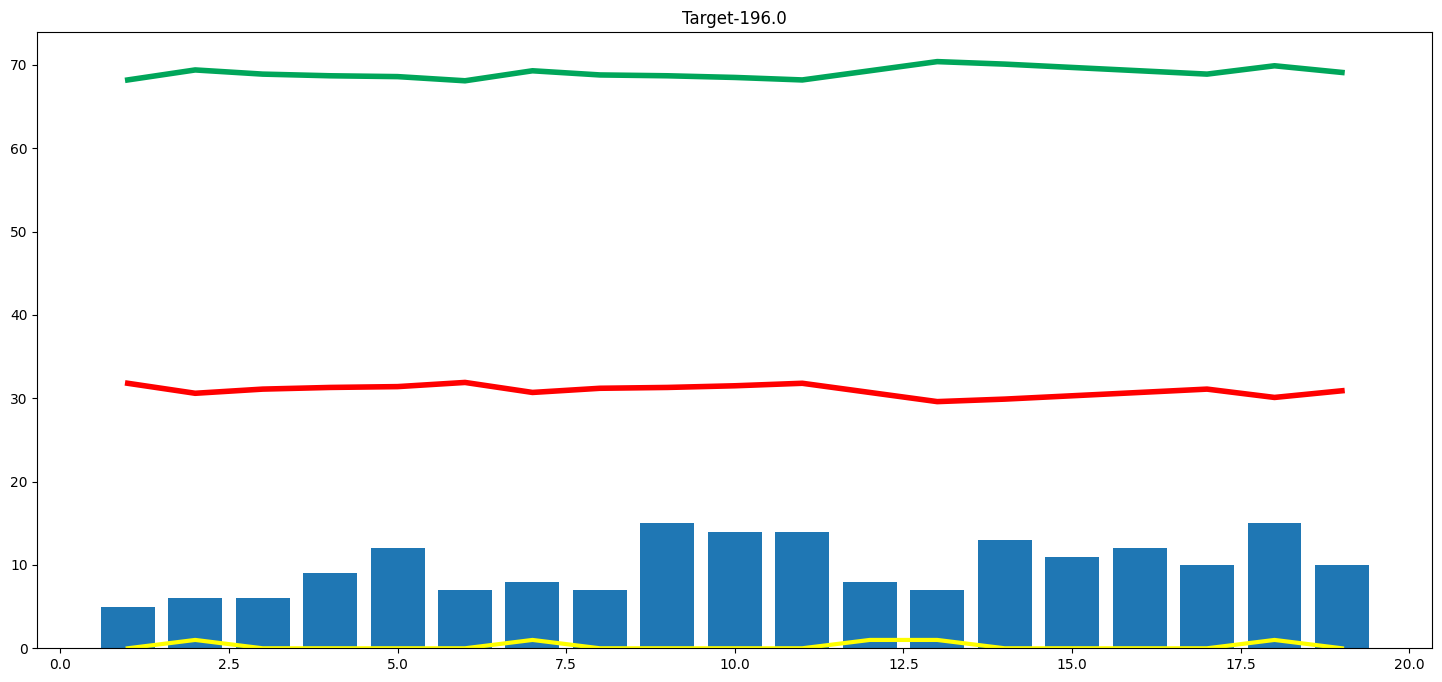

In [84]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='yellow',linewidth=3)
plt.plot(temp_df['end_of_over'],temp_df['win'],color='#00a65a',linewidth=4)
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4)
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])
plt.title('Target-' + str(target))